In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df.shape

(1338, 7)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [39]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [41]:
# gender wise mean of charges
r1 = df.groupby(['sex'])['charges'].mean()
r1

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

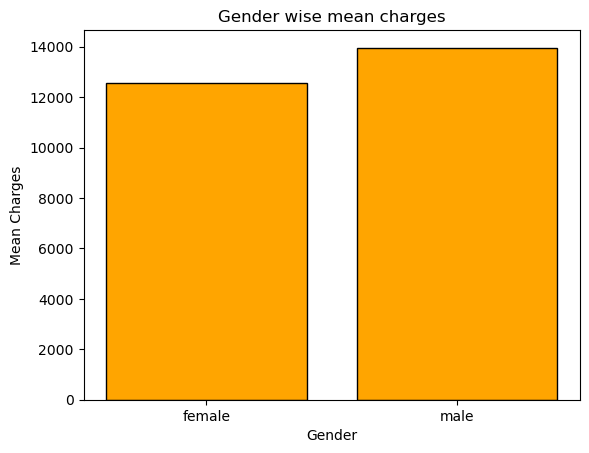

In [42]:
plt.bar(r1.index,r1,color='orange',edgecolor='black')
plt.title('Gender wise mean charges')
plt.xlabel('Gender')
plt.ylabel('Mean Charges')
plt.show()

In [43]:
# smoker wise mean of charges
r2 = df.groupby(['smoker'])['charges'].mean()
r2

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

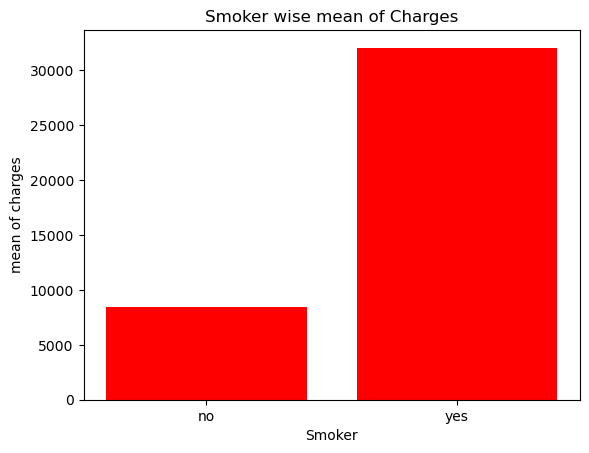

In [45]:
plt.bar(r2.index,r2,color='red')
plt.title('Smoker wise mean of Charges')
plt.xlabel('Smoker')
plt.ylabel("mean of charges")
plt.show()

In [46]:
# region wise mean of charges
r3 = df.groupby(['region'])['charges'].mean()
r3

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

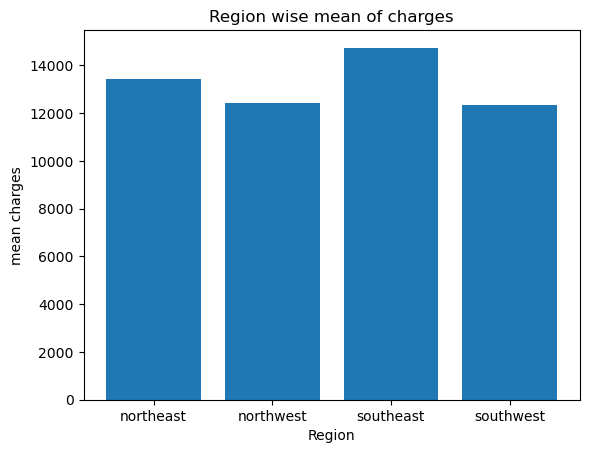

In [47]:
plt.bar(r3.index,r3)
plt.title("Region wise mean of charges")
plt.xlabel('Region')
plt.ylabel('mean charges')
plt.show()

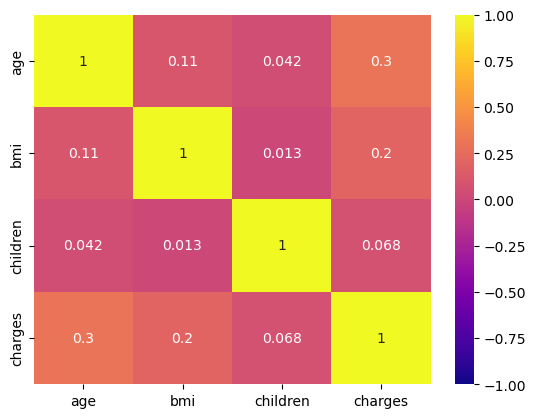

In [50]:
# correlation

sns.heatmap(df.corr(), cmap='plasma',annot=True,vmin=-1,vmax=1)
plt.show()

In [37]:
# fig, ax = plt.subplots(2,2,figsize =(10, 7))
# ax[0][0].hist(df['age'])
# ax[0][0].set_title('age')

# ax[0][1].hist(df['bmi'])
# ax[0][1].set_title('bmi')

# ax[1][0].hist(df['children'])
# ax[1][0].set_title('children')

# ax[1][1].hist(df['charges'])
# ax[1][1].set_title('charges')

# plt.show()

# Label Encoding

In [54]:
col = df.columns
col

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [64]:
cat_cols = []
for i in col:
    if df[i].dtypes == 'object':
        cat_cols.append(i)

In [65]:
cat_cols

['sex', 'smoker', 'region']

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
lb = LabelEncoder()

In [69]:
df['sex'] = lb.fit_transform(df['sex'])
df['smoker'] = lb.fit_transform(df['smoker'])
df['region'] = lb.fit_transform(df['region'])

In [70]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [72]:
 df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [73]:
x = df.drop('charges',axis=1)
y = df['charges']

In [74]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [75]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [76]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [77]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 6)
(335, 6)
(1003,)
(335,)


In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [90]:
def reg_eval_metrics(y, ypred):
    mae = mean_absolute_error(y, ypred)
    mse = mean_squared_error(y, ypred)
    rmse = np.sqrt(mean_squared_error(y, ypred))
    r2 = r2_score(y, ypred)
    
    print('Mean Absolute Error - ',mae)
    print('Mean Squared Error - ',mse)
    print('Root Mean Squared Error - ',rmse)
    print('R2 score - ',r2)
    
def train_test_scr(model):
    print('Training Score - ',model.score(x_train,y_train))
    print('Testing Score - ',model.score(x_test,y_test))

# Linear Regression

In [91]:
lm = LinearRegression()

In [92]:
lm.fit(x_train,y_train)

LinearRegression()

In [93]:
ypred_ml = lm.predict(x_test)

In [94]:
train_test_scr(lm)

Training Score -  0.7551158429564245
Testing Score -  0.7338069544102044


In [95]:
reg_eval_metrics(y_test, ypred_ml)

Mean Absolute Error -  4019.636706785276
Mean Squared Error -  35807072.806139216
Root Mean Squared Error -  5983.901136059922
R2 score -  0.7338069544102044


# computing model coefficient and Intercept <br>
 y = mx + c

In [96]:
m = lm.coef_
c = lm.intercept_

print(m)
print(c)

[  252.07830816  -270.1850953    316.55473012   364.49255776
 24069.87438208  -259.23126409]
-11074.748658555884


# Equation of Linear Equation

In [97]:
df['Predicted Charges'] = lm.predict(x)
df.head()

,age,sex,bmi,children,smoker,region,charges,Predicted Charges
0,19,0,27.900,0,1,3,16884.92400,25838.796756
1,18,1,33.770,1,0,2,1725.55230,3728.559059
2,28,1,33.000,3,0,2,4449.46200,6734.580113
3,33,1,22.705,0,0,1,21984.47061,3901.794299
4,32,1,28.880,0,0,1,3866.85520,5604.441449


# Generating prediction result using the equation of Linear Equation

In [100]:
df['Predicted C with Equation'] = m[0]*df['age'] + m[1]*df['sex'] + m[2]*df['bmi'] + m[3]*df['children'] + m[4]*df['smoker'] + m[5]*df['region'] + c

In [101]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Predicted Charges,Predicted C with Equation
0,19,0,27.900,0,1,3,16884.92400,25838.796756,25838.796756
1,18,1,33.770,1,0,2,1725.55230,3728.559059,3728.559059
2,28,1,33.000,3,0,2,4449.46200,6734.580113,6734.580113
3,33,1,22.705,0,0,1,21984.47061,3901.794299,3901.794299
4,32,1,28.880,0,0,1,3866.85520,5604.441449,5604.441449


# Cross Validation

In [102]:
from sklearn.model_selection import KFold, cross_val_score

In [104]:
kf = KFold(n_splits=10)
m = LinearRegression()
scores = cross_val_score(m,x,y,cv=kf,scoring='r2')

print(scores)
print(scores.mean())

[0.78522549 0.73213924 0.73490618 0.67241306 0.7716613  0.78358383
 0.79318159 0.67054582 0.74216232 0.76222839]
0.7448047213193172
